In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import probDistInputNoise as model
import probTools as tools



# Checking stuff

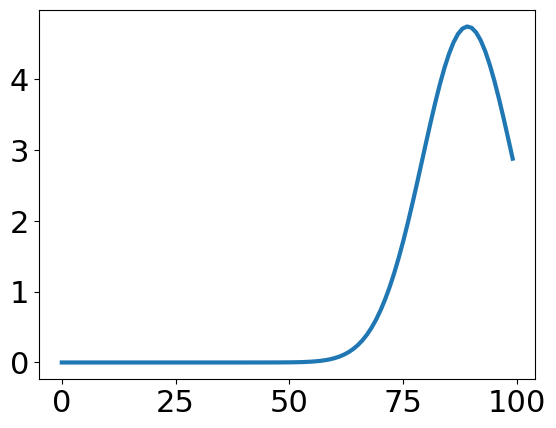

In [3]:
p_m_given_p_input = model.MI_efficient_encoding(0.9, 0.1)

plt.plot(p_m_given_p_input[0])

In [4]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full, [0.4], 0.5)

output_prob_dist


(100,)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.24795591, 3.34784966, 3.43583186, 3.51174405, 3.57614323,
        3.62903533, 3.6707517 , 3.70168137, 3.72205634, 3.73201439,
        3.7320364 , 3.72240348, 3.70339637, 3.67529327, 3.63836864,
        3.59284295, 3.53898545, 3.47710777, 3.4074692 , 3.33033012,
        3.24595456, 3.15461321, 3.05646308, 2.95189964, 2.84125699,
        2.72480209, 2.60286435, 2.47593834, 2.34431432, 2.20859593,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [5]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full,tools.input_scale_full, 0.1)

output_means = model.output_mean(tools.input_scale_full,tools.input_scale_full, 0.05)

(100,)
(100,)


In [6]:
np.shape(output_prob_dist)
np.shape(output_means)

(100,)

# Bias and variability predictions

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


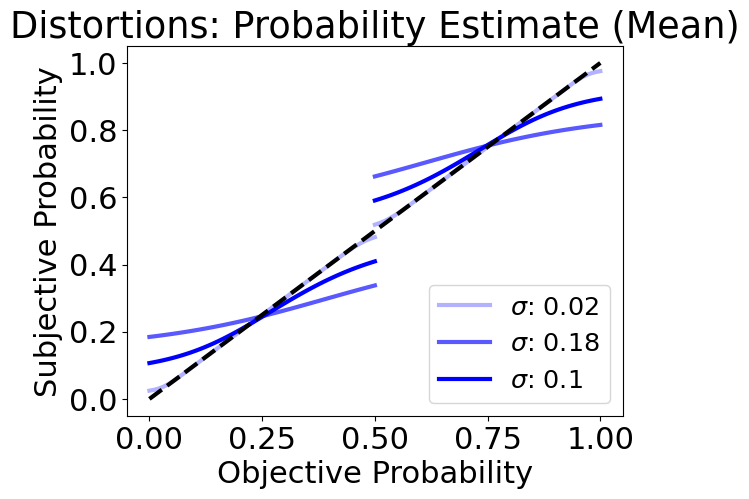

In [8]:
import matplotlib.pyplot as plt

sigma1 = 0.02
sigma2 = 0.18
sigma3 = 0.1


# Assuming 'tools' is a module or class that provides the required functions
output_scale, output_prob_dist1 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_scale, output_prob_dist2 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_scale, output_prob_dist3 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1,sigma3)

output_means11 = model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_means21 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_means31 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma3)
output_means12 = model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma1)
output_means22 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma2)
output_means32 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma3)

output_variances11 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_variances21 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_variances31 = model.output_variance(tools.input_scale_half1, tools.input_scale_half1,sigma3)

plt.plot(tools.input_scale_half1,output_means11, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale_half1,output_means21, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12, alpha=0.3, c="b")
plt.plot(tools.input_scale_half2,output_means22, alpha=0.65, c="b")
plt.plot(tools.input_scale_half2,output_means32, alpha=1.0, c="b")


plt.plot(tools.input_scale_full,tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


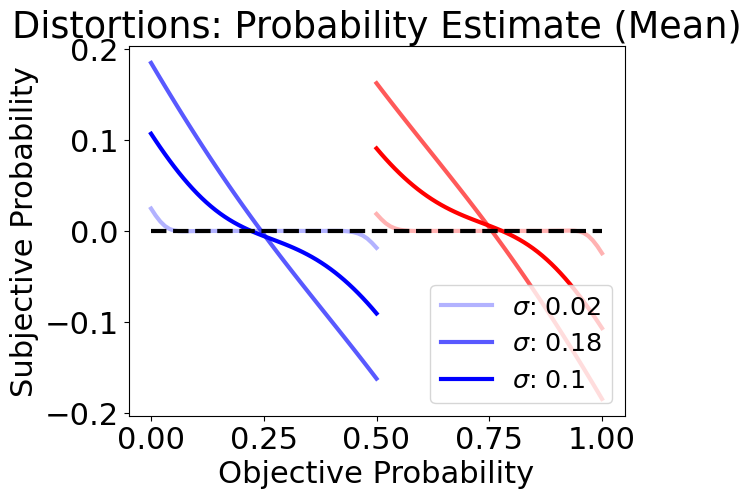

In [9]:


import matplotlib.pyplot as plt


plt.plot(tools.input_scale_half1,output_means11-tools.input_scale_half1, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale_half1,output_means21-tools.input_scale_half1, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31-tools.input_scale_half1, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12-tools.input_scale_half2, alpha=0.3, c="r")
plt.plot(tools.input_scale_half2,output_means22-tools.input_scale_half2, alpha=0.65, c="r")
plt.plot(tools.input_scale_half2,output_means32-tools.input_scale_half2, alpha=1.0, c="r")



plt.plot(tools.input_scale_full,tools.input_scale_full-tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


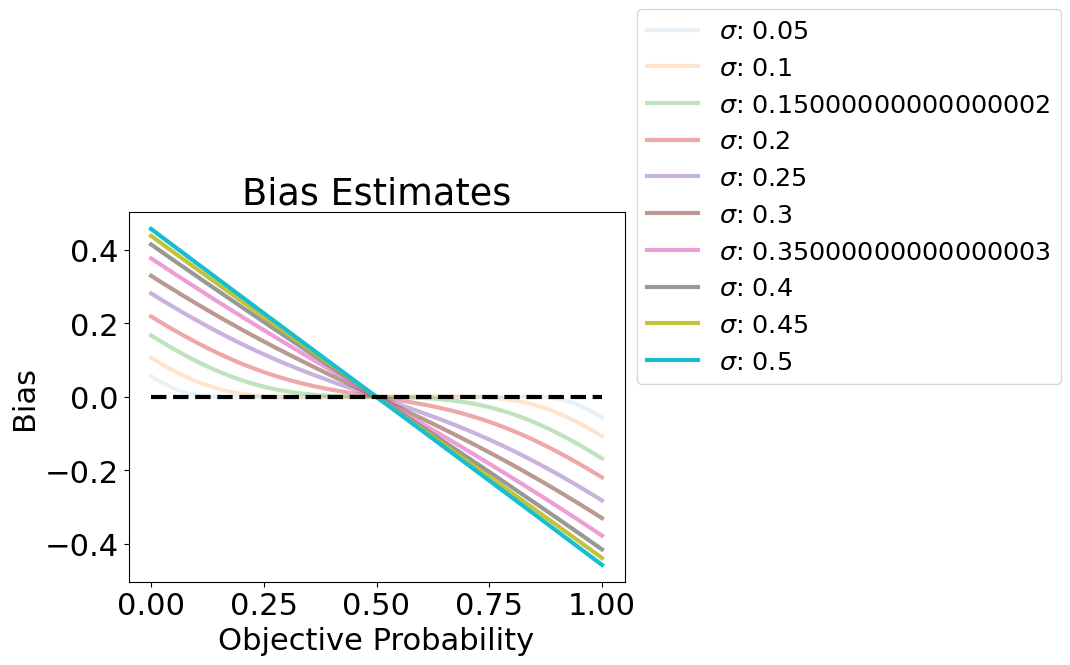

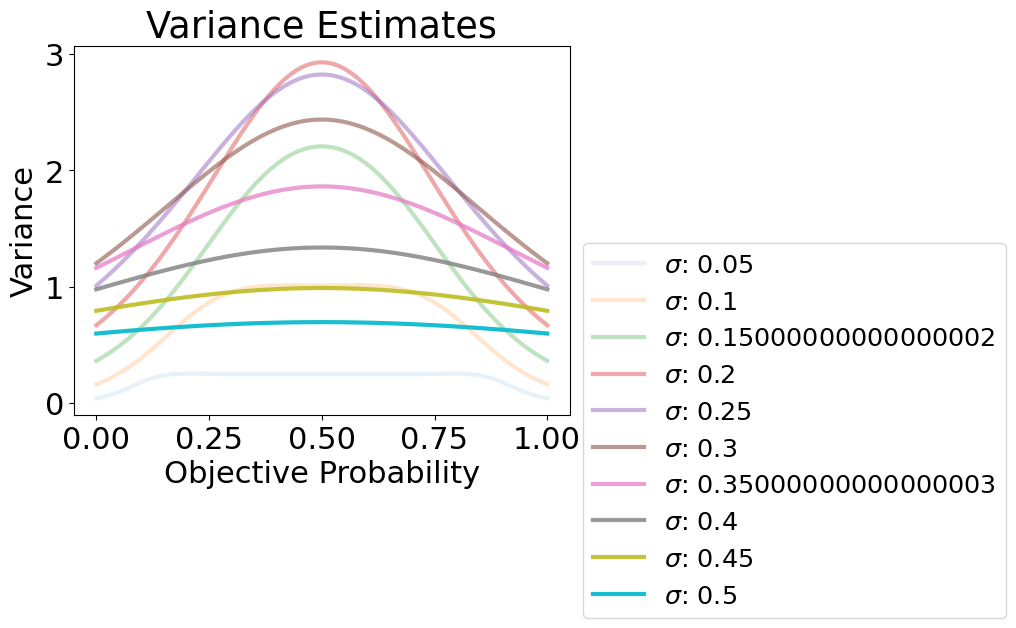

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma1 = 0.1
sigma2 = 0.18
sigma3 = 0.25

# New sigma values
sigma_values = np.arange(0.05, 0.55, 0.05)

# Lists to store means and variances
all_means = []
all_variances = []

# Loop over sigma values
for sigma in sigma_values:
    # Calculate means and variances
    output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
    output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)
    
    # Append means and variances to the lists
    all_means.append(output_means - tools.input_scale_full)
    all_variances.append(output_variances)

# Plotting means
for means, sigma in zip(all_means, sigma_values):
    plt.plot(tools.input_scale_full, means, alpha=sigma/0.5, label=f'$\sigma$: {sigma}')

# Plotting reference line
plt.plot(tools.input_scale_full, tools.input_scale_full - tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Bias')
plt.title('Bias Estimates')

# Move legend outside
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()

# Plotting variances
for variances, sigma in zip(all_variances, sigma_values):
    plt.plot(tools.input_scale_full, variances, alpha=sigma/0.5, label=f'$\sigma$: {sigma}')

plt.xlabel('Objective Probability')
plt.ylabel('Variance')
plt.title('Variance Estimates')

# Move legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()


In [58]:
import numpy as np

# Existing sigma values
sigma_values = np.arange(0.05, 0.55, 0.05)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []

for i in range(0, 5):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[20 * i:20 * i + 20].mean()
        bin_variances_i = output_variances[20 * i:20 * i + 20].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

# Print or use the resulting lists as needed
print("Bin Biases:", binBiases)
print("Bin Variances:", binVariances)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

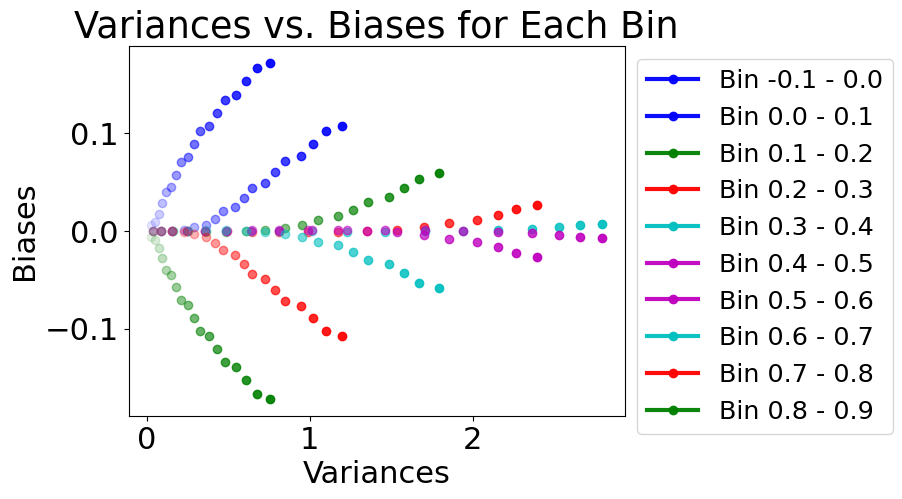

Correlation Values for Each Bin: [0.9859118214154705, 0.9769028540563929, 0.8957448129149974, 0.8035357369391396, 0.7171939988258464, -0.7171939988258453, -0.8035357369391395, -0.8957448129149966, -0.976902854056393, -0.9859118214154706]


In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
correlations = []  # List to store correlations

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate correlation for the current bin
    correlation = np.corrcoef(biases_i, variances_i)[0, 1]
    correlations.append(correlation)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Add labels and legend outside
plt.xlabel('Variances')
plt.ylabel('Biases')
plt.title('Variances vs. Biases for Each Bin')

# Move legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

# Print or use the correlation values as needed
print("Correlation Values for Each Bin:", correlations)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

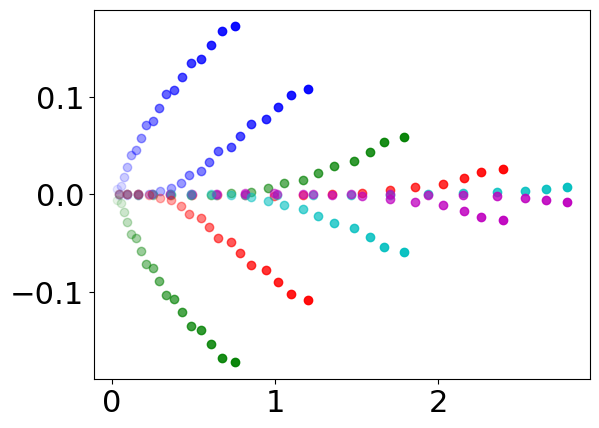

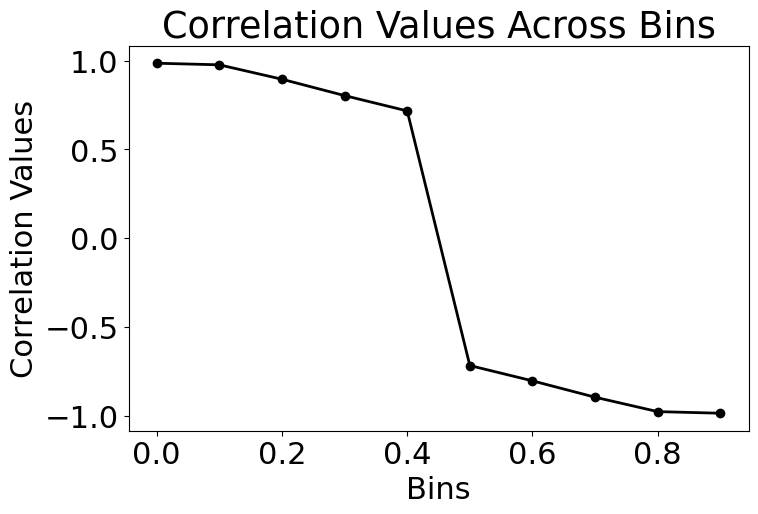

Correlation Values Across Bins: [0.9859118214154705, 0.9769028540563929, 0.8957448129149972, 0.8035357369391397, 0.7171939988258464, -0.7171939988258453, -0.8035357369391395, -0.8957448129149966, -0.9769028540563931, -0.9859118214154705]


In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
correlations = []  # List to store correlations

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate correlation for the current bin
    correlation = np.corrcoef(variances_i, biases_i)[0, 1]
    correlations.append(correlation)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Create a separate plot for correlation values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, 1, 0.1), correlations, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('Correlation Values')
plt.title('Correlation Values Across Bins')
plt.show()

# Print or use the correlation values as needed
print("Correlation Values Across Bins:", correlations)


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

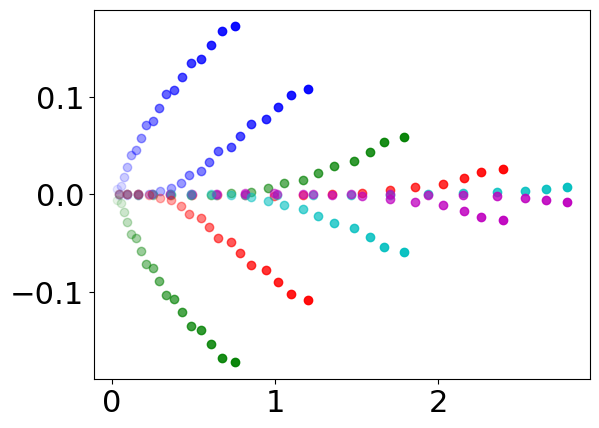

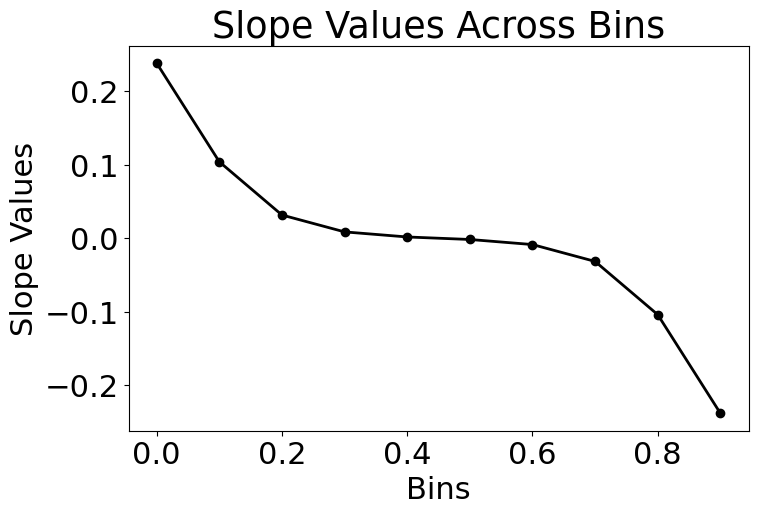

Slope Values Across Bins: [0.23819232288255016, 0.10402429625306824, 0.03158218479063768, 0.00861377537127278, 0.0017103082972352514, -0.001710308297235248, -0.00861377537127286, -0.03158218479063774, -0.10402429625306849, -0.23819232288255052]


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Existing sigma values
sigma_values = np.arange(0.02, 0.2, 0.01)

# Lists to store biases and variances for each bin
binBiases = []
binVariances = []
slopes = []  # List to store slopes

# Define color for each bin
bin_colors = ['b', 'g', 'r', 'c', 'm', 'm' ,'c', 'r', 'g', 'b']

for i in range(0, 10):
    # Initialize lists for each iteration
    biases_i = []
    variances_i = []

    # Loop over sigma values
    for sigma in sigma_values:
        # Calculate means and variances
        output_means = model.output_mean(tools.input_scale_full, tools.input_scale_full, sigma)
        output_variances = model.output_variance(tools.input_scale_full, tools.input_scale_full, sigma)

        # Calculate bin biases and variances
        bin_biases_i = (output_means - tools.input_scale_full)[10 * i:10 * i + 10].mean()
        bin_variances_i = output_variances[10 * i:10 * i + 10].mean()

        # Append values to lists
        biases_i.append(bin_biases_i)
        variances_i.append(bin_variances_i)

    # Append lists to the main lists
    binBiases.append(biases_i)
    binVariances.append(variances_i)

    # Calculate slope for the current bin
    slope, intercept, r_value, p_value, std_err = linregress(variances_i, biases_i)
    slopes.append(slope)

    # Plotting line plots for each bin with transparency based on sigma values
    bin_label = f'Bin {(i-1)/10} - {i/10}'  # Adjust the bin labels
    for sigma, (bias, variance) in zip(sigma_values, zip(biases_i, variances_i)):
        alpha_value = sigma / 0.2  # Set transparency inversely proportional to sigma
        if sigma == sigma_values[-1]:
            plt.plot(variance, bias, marker='o', label=bin_label, color=bin_colors[i-1], alpha=alpha_value)
        else:
            plt.plot(variance, bias, marker='o', color=bin_colors[i-1], alpha=alpha_value)

# Create a separate plot for slope values
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, 1, 0.1), slopes, marker='o', color='black', linestyle='-', linewidth=2)
plt.xlabel('Bins')
plt.ylabel('Slope Values')
plt.title('Slope Values Across Bins')
plt.show()

# Print or use the slope values as needed
print("Slope Values Across Bins:", slopes)
